# The Problem with Salesmen
By Robert Petro

## Statement of the Problem
The Traveling Salesman Problem (TSP) is outlined by the following question: "Given a list of cities and the distances between each city what is the shortest possible route one could take in order to visit every city once and return to the starting city?" The Traveling Salesman Problem is an NP-Hard problem in combinatorial optimization that holds importance in theoretical computer science and operations research. TSP has well known applications in the areas logistics, planning, and desgin (specifically the desgin of microchips) but some of its lesser know applications are in the fields of Astronomy and DNA sequencing.
## Solution Procedure
Two different graph formats will be used an adjacency matrix and adjacency list. All approaches will be run on these two types and compared.
A general randomized undirected complete graph will be used to run each algorithm. To break down the Traveling Salsman Problem the first approach will be the brute force approach. This approach starts by iterating through every permutaion of list of verticies and if it finds a list for which the total distance is less than the current optimal list then it replaces it. This proces repeates until it finds the shortes tour of all the cities. The next appraoch will be the dynamic programming approach. This approach follows the same logic and procedure as the brute force approach but with the added benefit of memoiziation which is using a data structure to remember already completed solutions so the same problem is not computed twice. The third approach is the Nearest neighbor appraoch. This approach is different from the brute force and dynamic programming approach in that this algorithm does not always find the shortest tour of the graph but an approximation of the shortest tour of the cities. This approximation may or may not be the optimal solution to the graph. This approach starts at a random node and then searches to find the nearest neighboring node and then repeates the process from that node. The nearest neighbor approach is a greedy algorithm. This is also an approximation algorithm. The fourth approach will be the Ant Colony Optimization Algorithm. This approach uses the ideas of pheremones and ants to create a pheremone map of the paths. Then the algorithm runs a set number of ants along the paths while updateding the pharemnone array. The ants perfer to use shorter paths with more pheremones and if a path is unused then phermones disappear over time (permutations in this case). This is another approximation alogrithm. The fifth approach is the 2-opt Algorithm. The appraoch of the 2-opt algorithm is to start with a solution to the TSP (using a random nearest neighbor solution) and then improve it by making small changes to the order in which the verticies are visited. The 2-opt algorithm makes these changes by swapping pairs of verticies in the proposed solution, and it repeats this process until no further improvement can be made and an approximation of the optimal tour is found. Using these six approaches comparisons will be made in the performance and accuracy between appraoches.
## Results and Discussion
The adjacency list and adjacency matrix have the same performance for the brute force approach when the number of vertices is less than or equal to 7. When the number of vertices is greater than 7 the adjacency list starts performing slower than the adjacency matrix. The brute force algorithm for both data structures performs in $O(n!)$. This is due to the fact that every permutation of cities must be checked in order to ensure that it is the optimal path. While Brute force is very slow it finds the optimal tour of all citites with the shortest distance. For the dynamic programming brute force appraoch the adjacency list and adjacency matrix have the same performance for the dynamic programming brute force approach when the number of vertices is less than or equal to 10. When the number of vertices is greater than 11 the adjacency list starts performing slower than the adjacency matrix. The dynamic programming brute force algorithm for both data sturctures performs in $O(2^nn^2)$. This is slightly faster than the normal brute force algorithm due to the fact that memoization is used to make sure an already computed path is not computed twice. While this approach is also slow it is faster than the normal brute force and produces the same optimal tour with the stortest path. For the nearest neighbor algorithm the adjacency matrix performs faster than the adjacency list until the number of vertices is aproximatly 10  which is when the adjacency list starts performing worse than the adjacency matrix for the nearest neighbor algorithm. The nearest neighbor algorithm for both data sturctures performs in $O(n^2)$. This is faster than the normal brute force algorithm but as it is approximation while it is faster than brute force the optimal solution is not guaranteed and does not always find the optimal solution to the problem. For the ant colony optimization algorithm. The adjacency matrix performs faster than the adjacency list until the number of vertices is 6 which is when the adjacency list starts performing worse than the adjacency matrix for the ant colony algorithm. This is faster than the normal brute force algorithm but as it is approximation meaing it does not always find the optimal solution. For the 2-opt algorithm the adjacency matrix performs faster than the adjacency list until the number of vertices is around 6 which is when the adjacency list starts performing better than the adjacency matrix for the 2-opt algorithm. The 2-opt algorithm for both data sturctures performs in $O(n^3)$. This is faster than the normal brute force algorithm but as it is approximation while it is faster than brute force the optimal solution is not guaranteed. Overall when using the adjacency list nearest neighbor, 2-opt, and dynamic programming perform at around the same time for all numbers of vertices. Ant colony optimization performs slower than these three algorithms. When the number of vertices is around 9 the brute force algorithm performs slower than all the other algorithms for the adjacency list. When looking at the total distance difference between the optimal and the found solution for the approximation algorithms, two opt gets the optimal solution or close to the optimal solution. While ant colony optimization and nearest neighbor get close the optimal solution more than getting the optimal solution. Overall when using the adjacency matrix brute force, dynamic programming, nearest neighbor, and 2-opt perform at around the same time for all numbers of vertices. The ant colony optimization performs slower than all the other algorithms for all numbers of vertices. When looking at the total distance difference between the optimal and the found solution for the approximation algorithms, the ant colony optimization performs well across the board and is close to if not exactly the optimal solution. While nearest neighbor and 2-opt for number of vertices less than 10 may achieve a solution close the optimal solution but for most cases less than 10 vertices it does not achieve the optimal solution. Most results can change based on choices made in a single run or slight differences in the edges in the graph but they show generally overall the trend in their ability to fnd the optimal soultion or be close to the optimal solution.

## Code

### Set Up Code

In [3]:
# imports
import random
import math
import time
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import networkx as nx
import itertools
from itertools import permutations

# Seeded Random
random.seed(478378)
rand.seed(567483)

# Distance Bounds
min_dist = 1
max_dist = 25

# Graph initilization
num_vert = 6
def generate_dists(verts):
    dists = dict()
    for i in range(verts):
        dists.update({i:{}})
    for i in range(verts):
        for j in range(verts):
            if i != j and j not in dists.get(i).keys():
                dist = random.randint(min_dist, max_dist)
                dists.get(i).update({j:dist})
                dists.get(j).update({i:dist})
    return dists

# Cities Array
cities = [i for i in range(num_vert)]
print(cities)

# Adjacency List
adj_list = generate_dists(num_vert)
print(adj_list)

# Adjacency Matrix
def create_matrix(distances):
    matrix = [[0 for _ in range(num_vert)] for _ in range(num_vert)]
    for i in adj_list.keys():
        for j in adj_list.get(i).keys():
            matrix[i][j] = adj_list.get(i).get(j)
    return matrix
adj_matrix = create_matrix(adj_list)
print(adj_matrix)

[0, 1, 2, 3, 4, 5]
{0: {1: 2, 2: 18, 3: 13, 4: 22, 5: 19}, 1: {0: 2, 2: 20, 3: 10, 4: 25, 5: 3}, 2: {0: 18, 1: 20, 3: 5, 4: 5, 5: 2}, 3: {0: 13, 1: 10, 2: 5, 4: 15, 5: 18}, 4: {0: 22, 1: 25, 2: 5, 3: 15, 5: 10}, 5: {0: 19, 1: 3, 2: 2, 3: 18, 4: 10}}
[[0, 2, 18, 13, 22, 19], [2, 0, 20, 10, 25, 3], [18, 20, 0, 5, 5, 2], [13, 10, 5, 0, 15, 18], [22, 25, 5, 15, 0, 10], [19, 3, 2, 18, 10, 0]]


### Graph Visualized

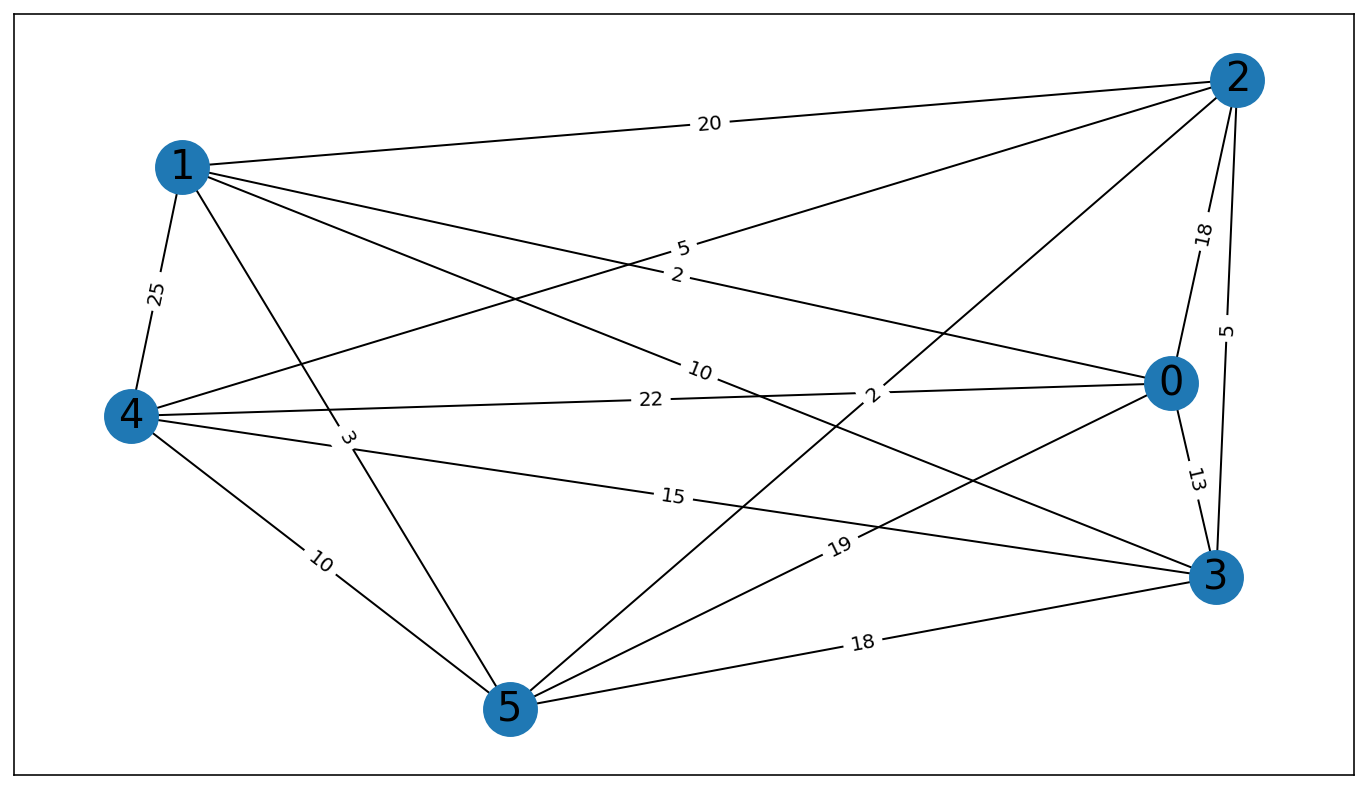

In [4]:
G = nx.Graph(np.array(adj_matrix))
pos = nx.spring_layout(G, seed=5)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

### Brute Force Approach

#### Adjacency List

In [5]:
def brute_force_adj_list(graph, source = 0):
    min_distance = float('inf')
    best_route = None
    for route in permutations(graph.keys()):
        route = list(route) + [route[source]]
        distance = 0
        for i in range(len(route) - 1):
            distance += graph.get(route[i]).get(route[i + 1])
        if distance < min_distance:
            min_distance = distance
            best_route = route
    return best_route, min_distance

In [6]:
path, dist = brute_force_adj_list(adj_list)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 4, 2, 3, 0] with a distance of 38


##### Path Visualization

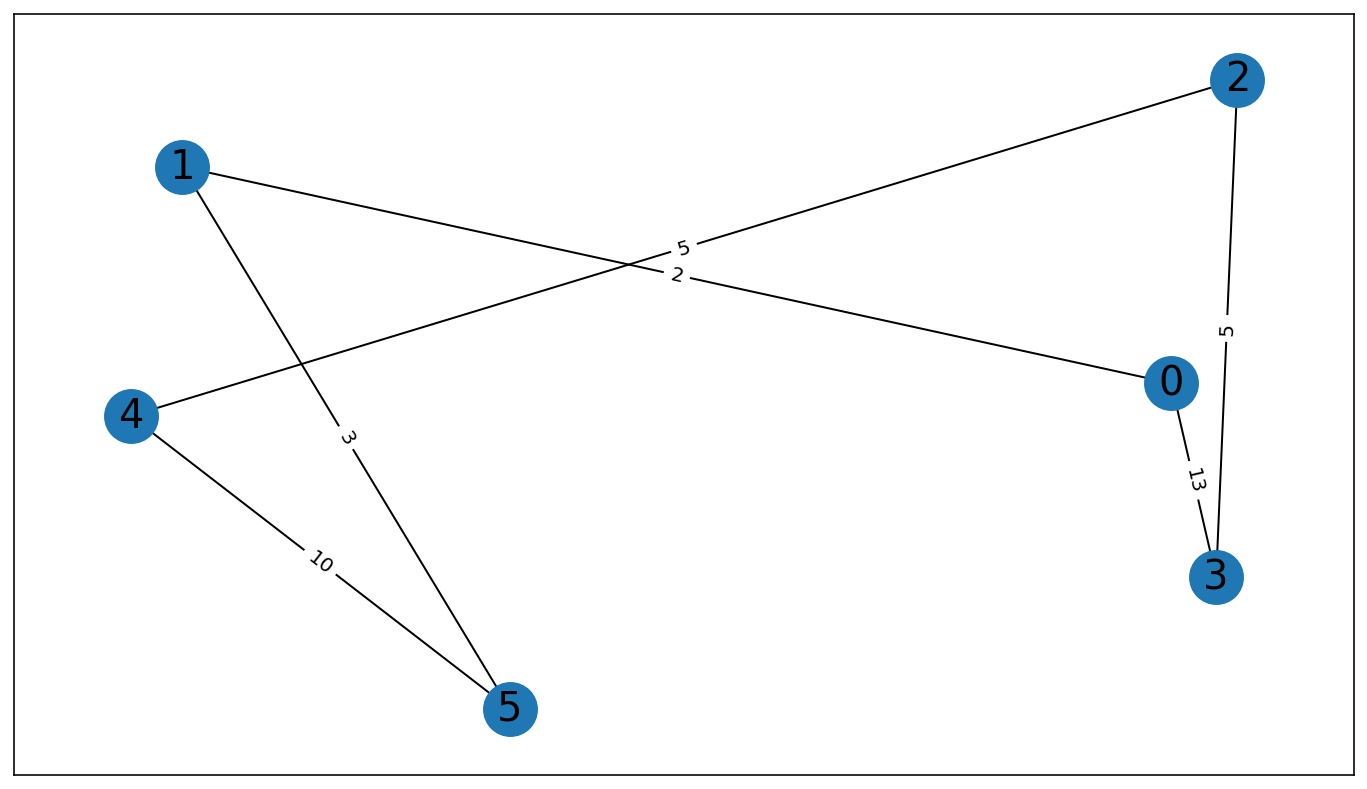

In [7]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Adjacency Matrix

In [8]:
def brute_force_adj_matrix(graph, source = 0):
    min_distance = float('inf')
    best_route = None
    for route in permutations([i for i in range(len(graph))]):
        route = list(route) + [route[source]]
        distance = 0
        for i in range(len(route) - 1):
            distance += graph[route[i]][route[i + 1]]
        if distance < min_distance:
            min_distance = distance
            best_route = route
    return best_route, min_distance

In [9]:
path, dist = brute_force_adj_matrix(adj_matrix)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 4, 2, 3, 0] with a distance of 38


##### Path Visualization

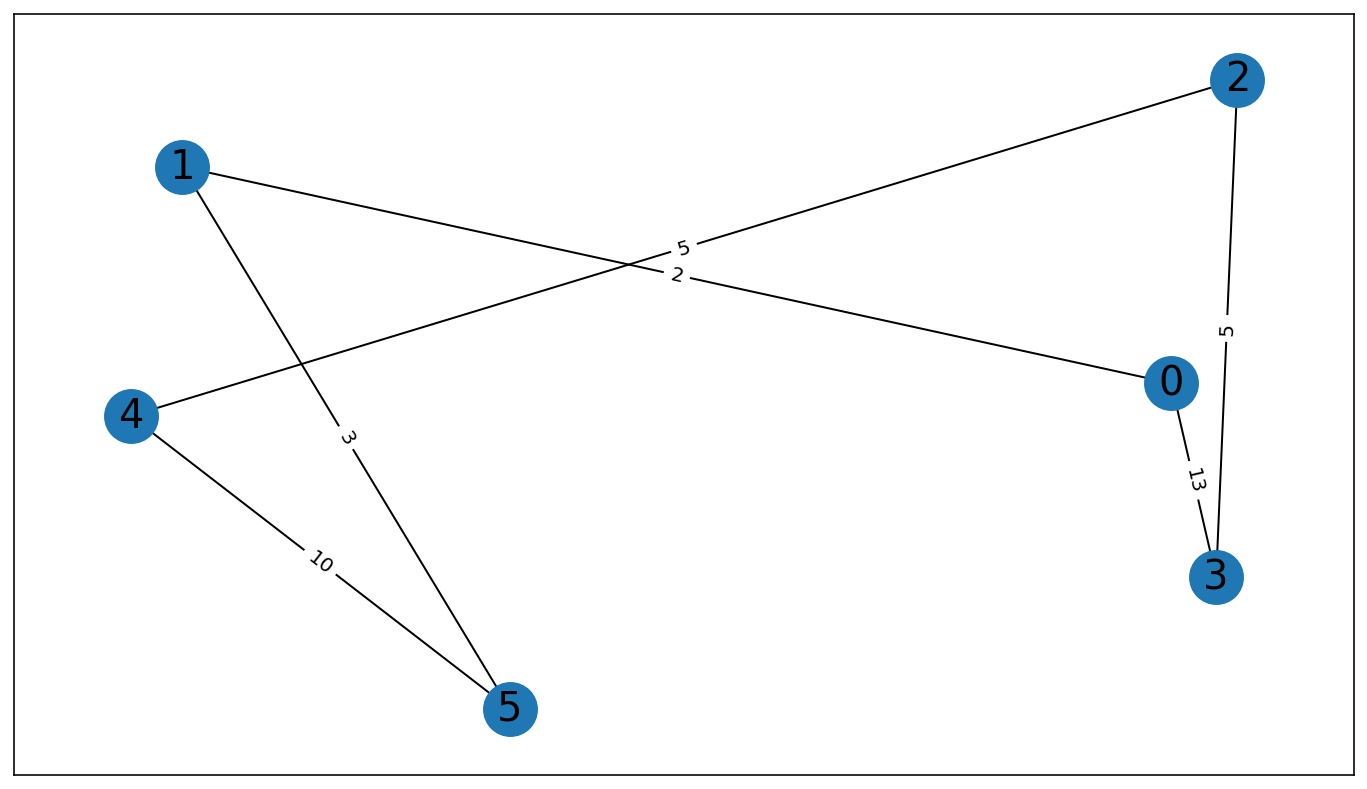

In [10]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Graph

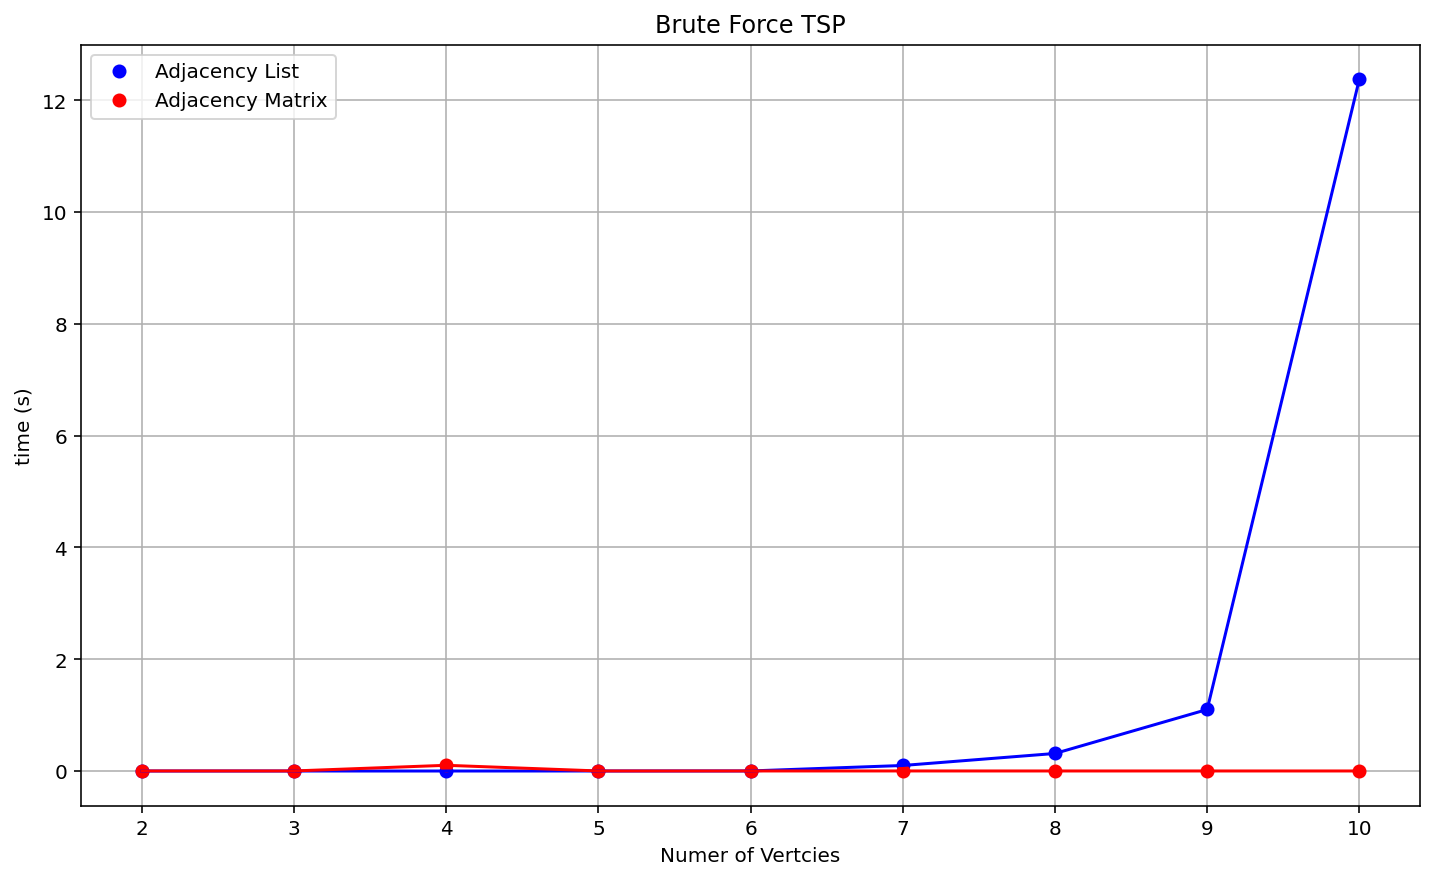

In [11]:
# Brute Force Graph
y1 = []
y2 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    brute_force_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    
    start = time.time()
    brute_force_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
plt.plot(sample, y1,'bo', label="Adjacency List")
plt.plot(sample, y2,'ro', label="Adjacency Matrix")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

# Graph setup
plt.title("Brute Force TSP")
plt.xlabel("Numer of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

The adjacency list and adjacency matrix have the same performance for the brute force approach when the number of vertices is less than or equal to 7. When the number of vertices is greater than 7 the adjacency list starts performing slower than the adjacency matrix. While not show in the graph due to performance problems the adjacecy matrix starts perfoming slower and slower as the number of vertices increases. The brute force algorithm for both data structures performs in $O(n!)$. This is due to the fact that every permutation of cities must be checked in order to ensure that it is the optimal path.

### Dynamic Programming Approach

#### Adjacency List

In [12]:
def TSP_DP_adj_list(graph):
    n = len(graph.keys())
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (graph.get(0).get(k), 0)

    # Iterate subsets of increasing length and store intermediate results
    # in classic dynamic programming manner
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + graph.get(m).get(k), m))
                C[(bits, k)] = min(res)

    # We're interested in all bits but the least significant (the start state)
    bits = (2**n - 1) - 1

    # Calculate optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + graph.get(k).get(0), k))
    opt, parent = min(res)

    # Backtrack to find full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add implicit start state and end state
    path.append(0)
    path.insert(0, 0)

    return list(path), opt

In [13]:
path, dist = TSP_DP_adj_list(adj_list)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 4, 2, 3, 0] with a distance of 38


#### Path Visualization

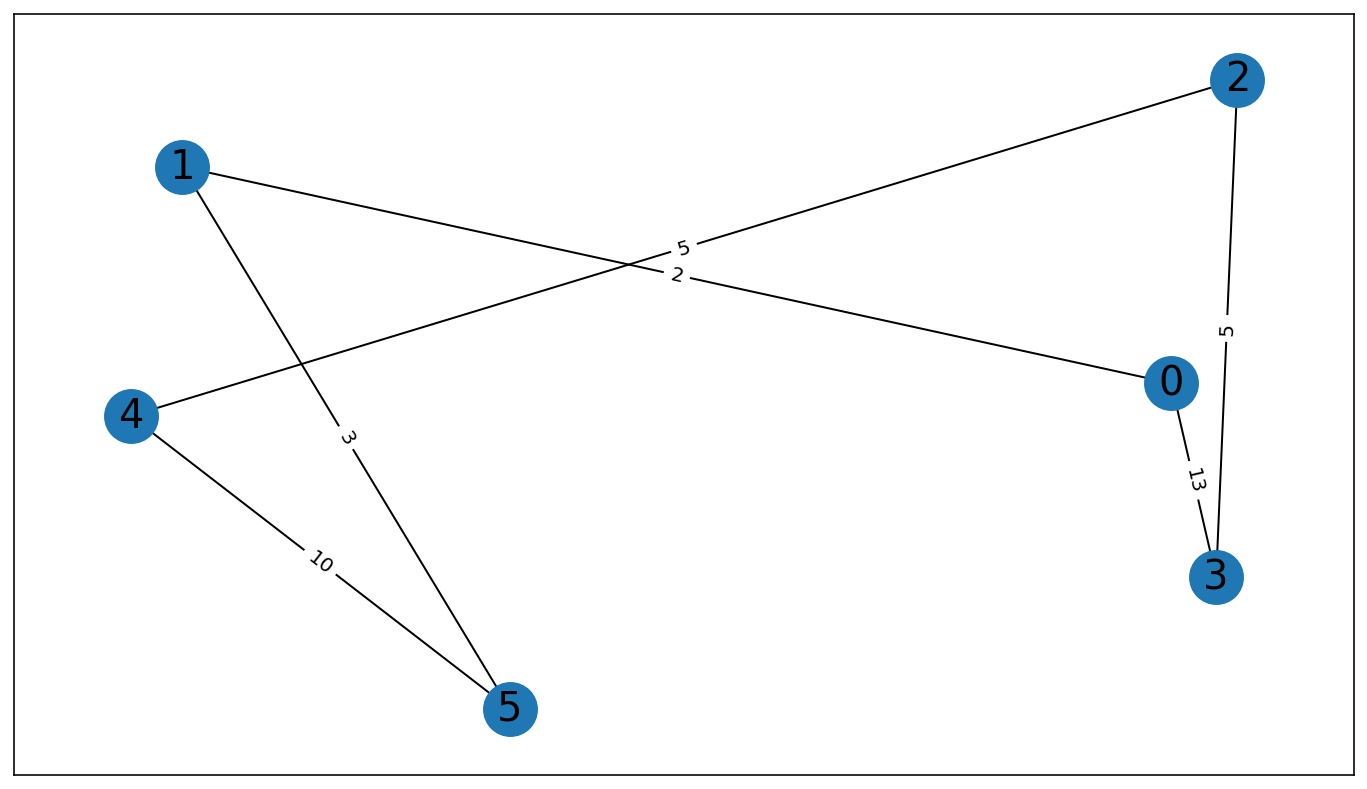

In [14]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Adjacency Matrix

In [15]:
def TSP_DP_adj_matrix(graph):
    n = len(graph)
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (graph[0][k], 0)

    # Iterate subsets of increasing length and store intermediate results
    # in classic dynamic programming manner
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            # Set bits for all nodes in this subset
            bits = 0
            for bit in subset:
                bits |= 1 << bit

            # Find the lowest cost to get to this subset
            for k in subset:
                prev = bits & ~(1 << k)

                res = []
                for m in subset:
                    if m == 0 or m == k:
                        continue
                    res.append((C[(prev, m)][0] + graph[m][k], m))
                C[(bits, k)] = min(res)

    # We're interested in all bits but the least significant (the start state)
    bits = (2**n - 1) - 1

    # Calculate optimal cost
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + graph[k][0], k))
    opt, parent = min(res)

    # Backtrack to find full path
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits

    # Add implicit start state and end state
    path.append(0)
    path.insert(0, 0)

    return list(path), opt

In [16]:
path, dist = TSP_DP_adj_matrix(adj_matrix)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 4, 2, 3, 0] with a distance of 38


#### Path Visualization

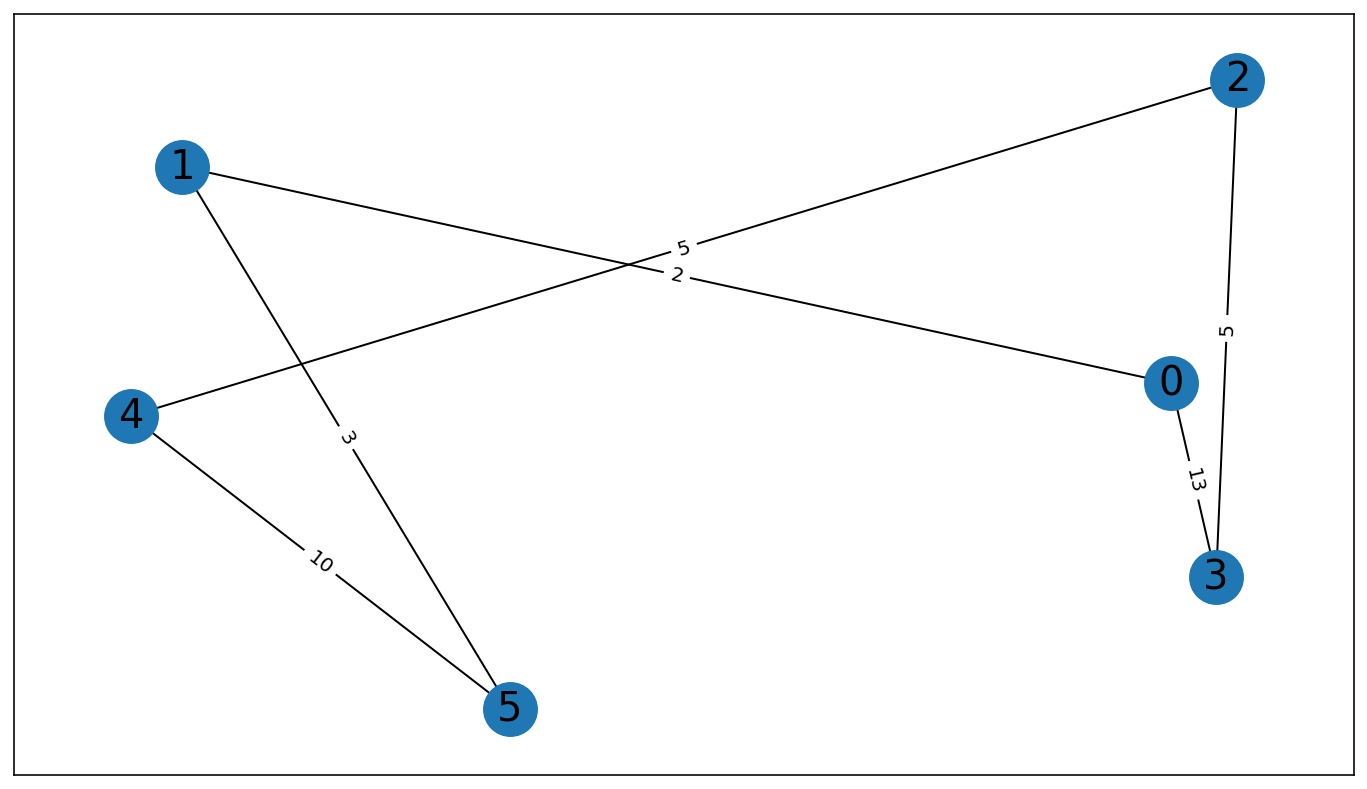

In [17]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Graph

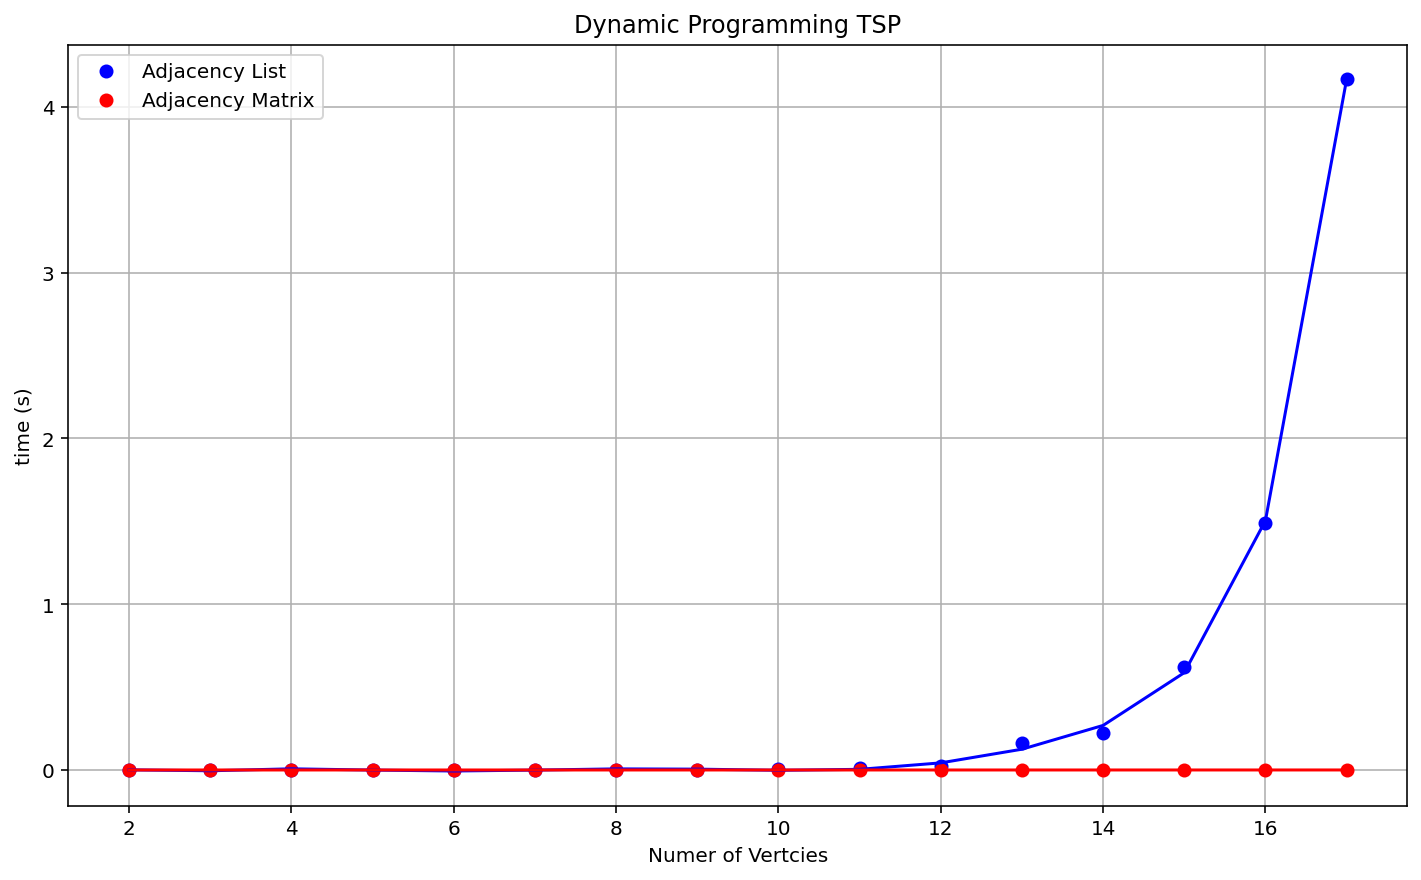

In [18]:
# Dynamic Programming Graph
y1 = []
y2 = []
sample = np.array([i for i in range(2, 18)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    TSP_DP_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    
    start = time.time()
    TSP_DP_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
plt.plot(sample, y1,'bo', label="Adjacency List")
plt.plot(sample, y2,'ro', label="Adjacency Matrix")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

# Graph setup
plt.title("Dynamic Programming TSP")
plt.xlabel("Numer of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

The adjacency list and adjacency matrix have the same performance for the dynamic programming brute force approach when the number of vertices is less than or equal to 10. When the number of vertices is greater than 11 the adjacency list starts performing slower than the adjacency matrix. While not show in the graph the adjacecy matrix starts perfoming slower and slower as the number of vertices increases. The dynamic programming brute force algorithm for both data sturctures performs in $O(2^nn^2)$. This is slightly faster than the normal brute force algorithm due to the fact that memoization is used to make sure an already computed path is not computed twice.

### Nearest Neighbor (Greedy Approximation Algorithm)

#### Adjacency List

In [19]:
def nearest_neighbor_adj_list(graph):
    route = [0]
    remaining_cities = [i for i in graph.keys() if i != 0]
    while remaining_cities:
        closest_city = min(remaining_cities, key=lambda x: graph.get(route[-1]).get(x))
        route.append(closest_city)
        remaining_cities.remove(closest_city)
    route.append(route[0])
    distance = sum(graph.get(route[i]).get(route[i+1]) for i in range(len(route)-1))
    return route, distance

In [20]:
path, dist = nearest_neighbor_adj_list(adj_list)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 2, 3, 4, 0] with a distance of 49


##### Path Visualization

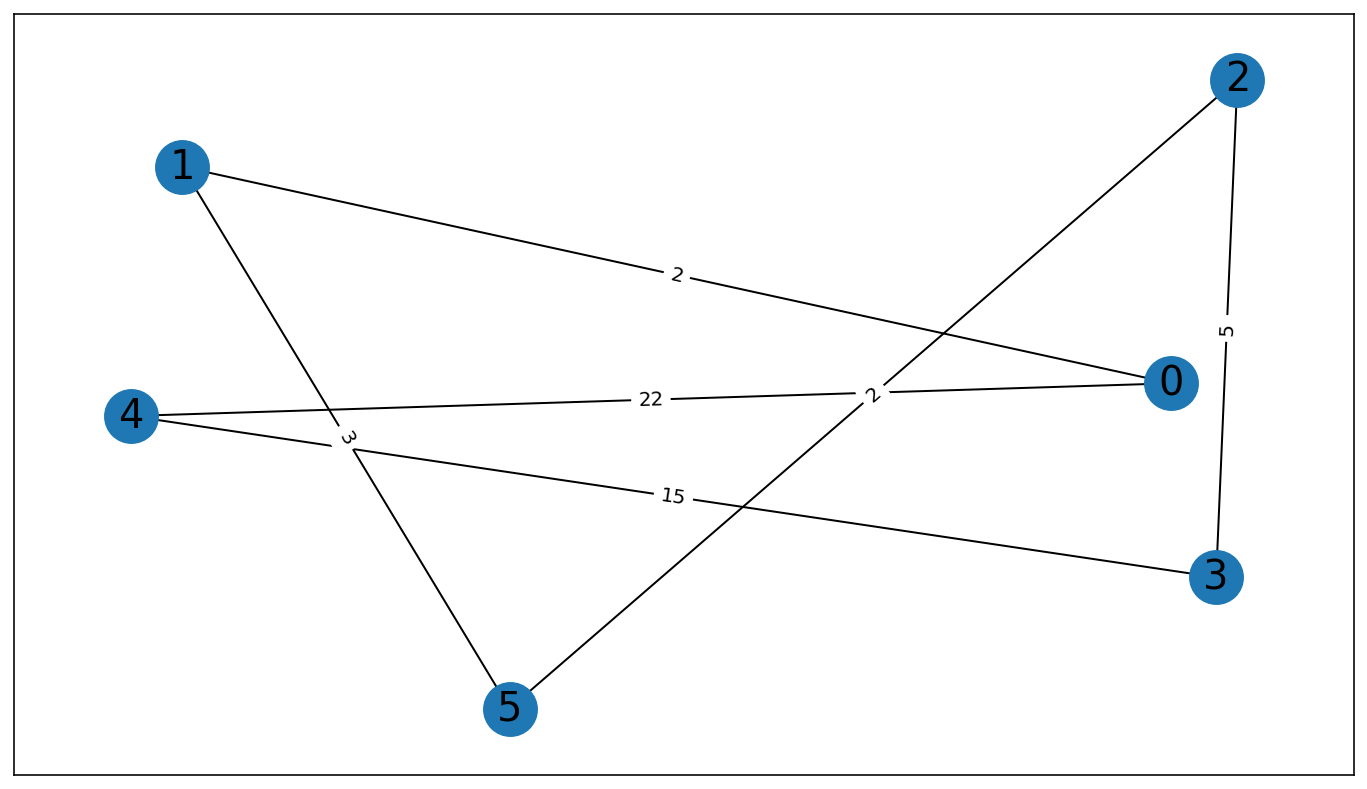

In [21]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Adjacency Matrix

In [22]:
def nearest_neighbor_adj_matrix(graph):
    route = [0]
    remaining_cities = [i for i in range(1,len(graph))]
    while remaining_cities:
        closest_city = min(remaining_cities, key=lambda x: graph[route[-1]][x])
        route.append(closest_city)
        remaining_cities.remove(closest_city)
    route.append(route[0])
    distance = sum(graph[route[i]][route[i+1]] for i in range(len(route)-1))
    return route, distance

In [23]:
path, dist = nearest_neighbor_adj_matrix(adj_matrix)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 2, 3, 4, 0] with a distance of 49


##### Path Visualization

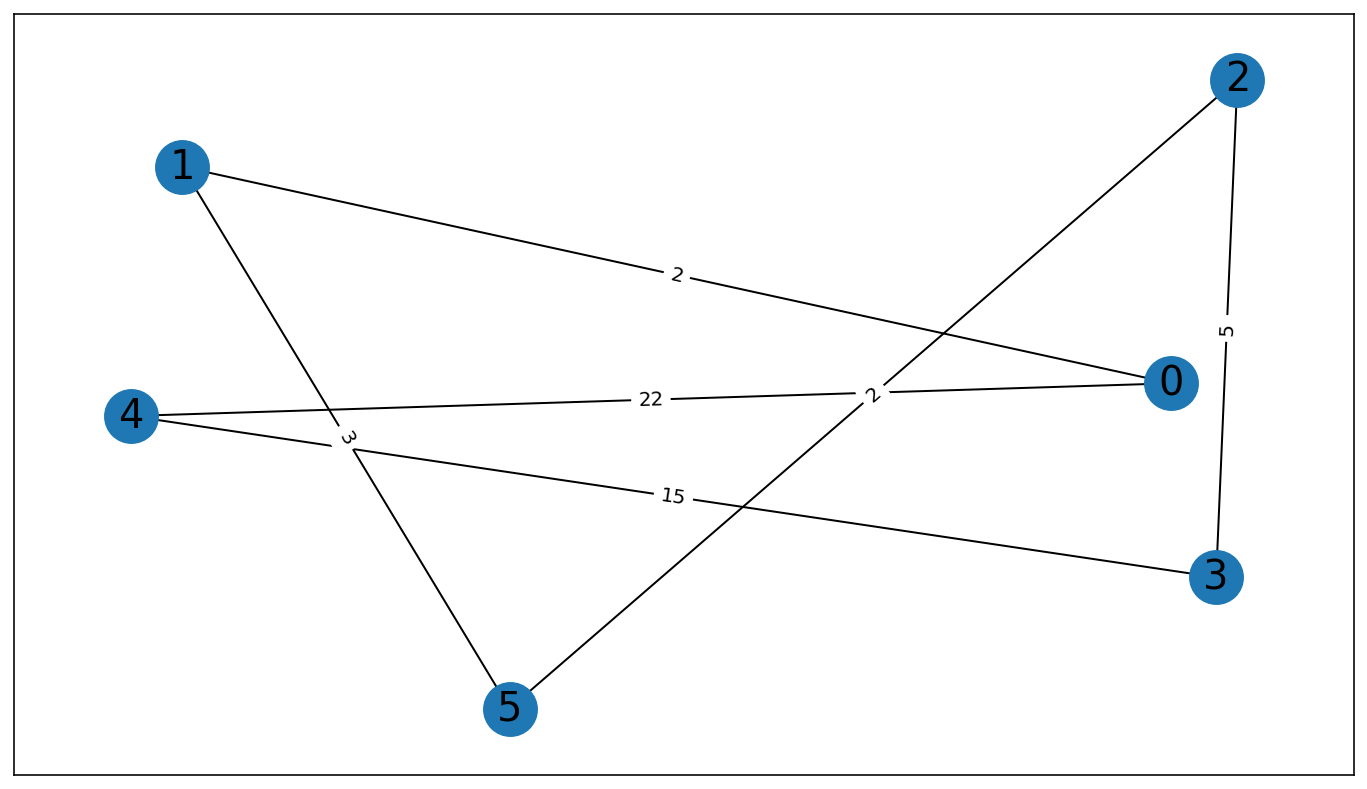

In [24]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Graph

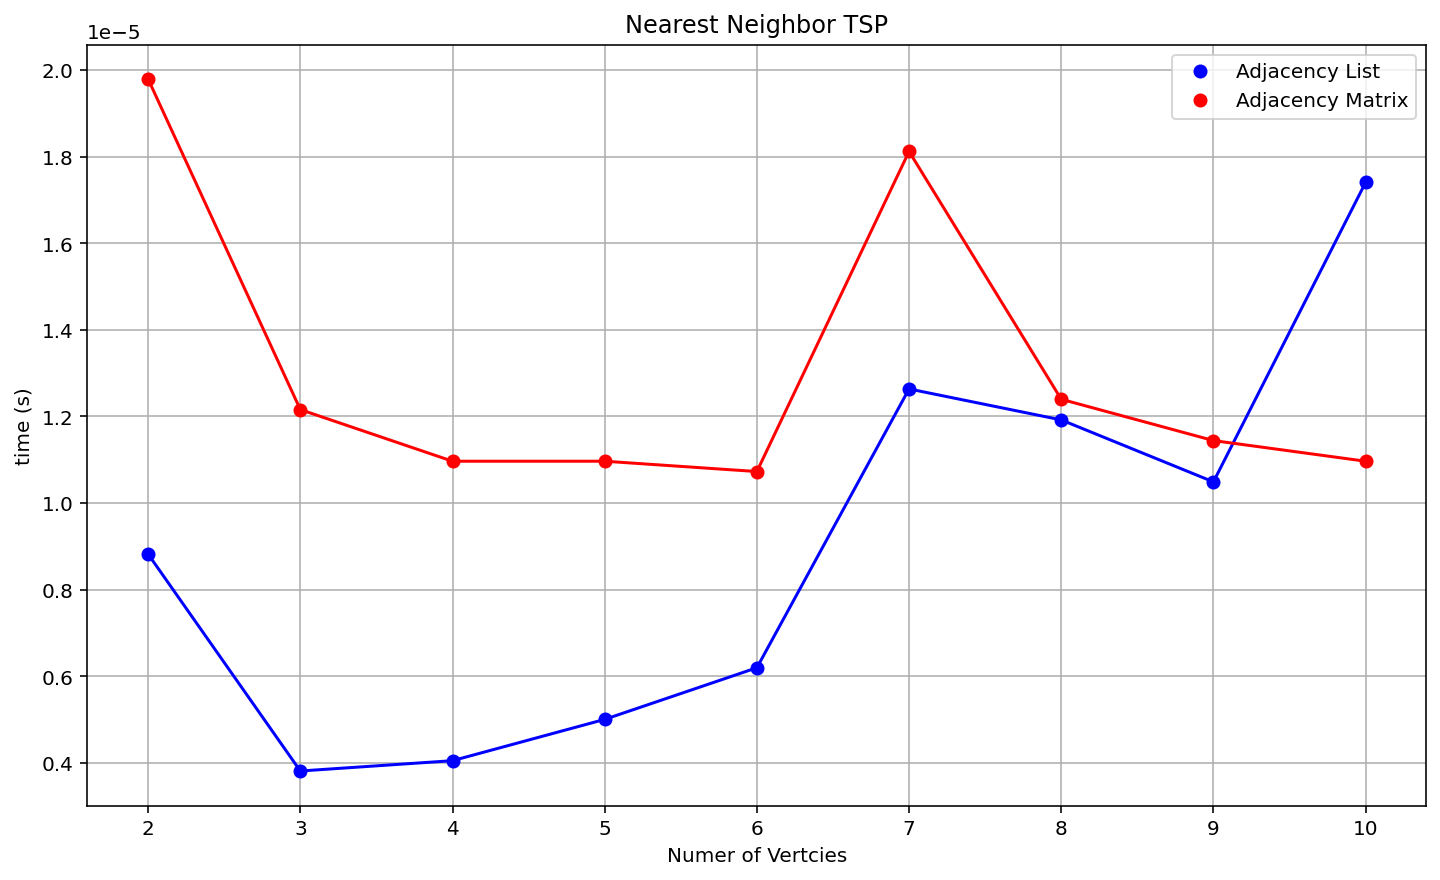

In [25]:
# Nearest Neighbor Graph
y1 = []
y2 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    nearest_neighbor_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    
    start = time.time()
    nearest_neighbor_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
plt.plot(sample, y1,'bo', label="Adjacency List")
plt.plot(sample, y2,'ro', label="Adjacency Matrix")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

# Graph setup
plt.title("Nearest Neighbor TSP")
plt.xlabel("Numer of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

The adjacency matrix performs faster than the adjacency list until the number of vertices is 10  which is when the adjacency list starts performing worse than the adjacency matrix for the nearest neighbor algorithm. The nearest neighbor algorithm for both data sturctures performs in $O(n^2)$. This is faster than the normal brute force algorithm but as it is approximation while it is faster than brute force the optimal solution is not guaranteed.

### Ant Colony Optimization Approach

#### Adjacency List

In [26]:
def cycle_length_adj_list(graph, cycle):
    length = 0
    if cycle:
        for i in range(len(cycle) - 1):
            length += graph.get(cycle[i]).get(cycle[i + 1])
    return length

In [27]:
def traverse_graph_adj_list(graph, intensity, source_node = 0):
    ALPHA = 0.9
    BETA = 1.5
    visited = np.asarray([1 for _ in range(len(graph.keys()))]) # originally no nodes have been visited
    visited[source_node] = 0 # except the source node.

    cycle = [source_node]
    steps = 0
    current = source_node
    total_length = 0
    while steps < len(graph.keys()) - 1:

        jumps_neighbors = []
        jumps_values = []
        for node in range(len(graph.keys())):
            if visited[node] != 0:
                pheromone_level = max(intensity[current][node], 1e-5) # constant added to encourage exploration
                v = (pheromone_level ** ALPHA ) / (graph.get(current).get(node) ** BETA) 
                jumps_neighbors.append(node)
                jumps_values.append(v)

        next_node = rand.choices(jumps_neighbors, weights = jumps_values)[0] # weighted (normalized) choice
       
        visited[next_node] = 0
        current = next_node
        cycle.append(current)
        steps+=1

    total_length = cycle_length_adj_list(graph, cycle) # just adds all the distances
    assert len(list(set(cycle))) == len(cycle)
    return cycle, total_length

In [28]:
def ant_colony_optimization_adj_list(graph, verbose = True, iterations = 100, ants_per_iteration = 50, q = 10, degradation_factor = .9):
    intensity = np.array([[100 for _ in range(len(graph.keys()))] for _ in range(len(graph.keys()))]).astype('float64')
            
    best_cycle = None
    best_length = float('inf')

    for iteration in range(iterations):
        cycles = [traverse_graph_adj_list(graph, intensity, rand.randint(0, len(graph.keys()) - 1)) for _ in range(ants_per_iteration)]
        cycles.sort(key = lambda x: x[1])
        cycles = cycles[: ants_per_iteration // 2] #optionally keep best half.

        if best_cycle: #elitism
            cycles.append((best_cycle, best_length))

        for cycle, total_length in cycles: # pheromone update
            total_length = cycle_length_adj_list(graph, cycle)
            if total_length < best_length:
                best_length = total_length
                best_cycle = cycle

            delta = q / total_length
            i = 0
            while i < len(cycle) - 1:
                intensity[cycle[i]][cycle[i+1]]+= delta
                i+=1
            intensity[cycle[i]][cycle[0]] += delta
            intensity *= degradation_factor
    
    best_cycle.append(best_cycle[0])

    return best_cycle, cycle_length_adj_list(graph, best_cycle)

In [29]:
path, dist = ant_colony_optimization_adj_list(adj_list)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 4, 2, 3, 0] with a distance of 38


#### Path Visualization

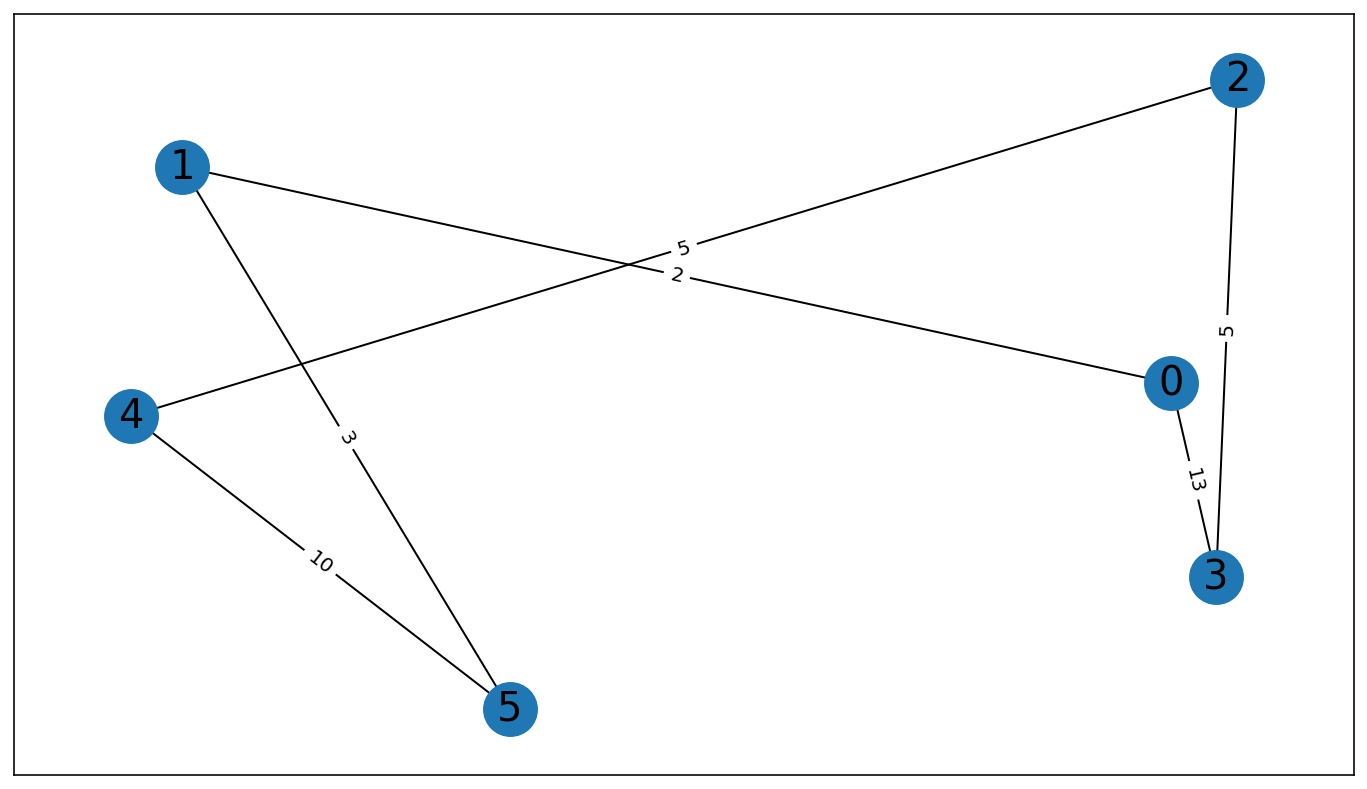

In [30]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Adjacency Matrix

In [31]:
def cycle_length_adj_matrix(graph, cycle):
    length = 0
    if cycle:
        for i in range(len(cycle) - 1):
            length += graph[cycle[i]][cycle[i + 1]]
    return length

In [32]:
def traverse_graph_adj_matrix(graph, intensity, source_node = 0):
    ALPHA = 0.9
    BETA = 1.5
    visited = np.asarray([1 for _ in range(len(graph))]) # originally no nodes have been visited
    visited[source_node] = 0 # except the source node.

    cycle = [source_node]
    steps = 0
    current = source_node
    total_length = 0
    while steps < len(graph) - 1:

        jumps_neighbors = []
        jumps_values = []
        for node in range(len(graph)):
            if visited[node] != 0:
                pheromone_level = max(intensity[current][node], 1e-5) # constant added to encourage exploration
                v = (pheromone_level ** ALPHA ) / (graph[current][node]**BETA) 
                jumps_neighbors.append(node)
                jumps_values.append(v)

        next_node = rand.choices(jumps_neighbors, weights = jumps_values)[0] # weighted (normalized) choice
       
        visited[next_node] = 0
        current = next_node
        cycle.append(current)
        steps+=1

    total_length = cycle_length_adj_matrix(graph, cycle) # just adds all the distances
    assert len(list(set(cycle))) == len(cycle)
    return cycle, total_length

In [33]:
def ant_colony_optimization_adj_matrix(graph, verbose = True, iterations = 100, ants_per_iteration = 50, q = 10, degradation_factor = .9):
    intensity = np.array([[100 for _ in range(len(graph))] for _ in range(len(graph))]).astype('float64')
            
    best_cycle = None
    best_length = float('inf')

    for iteration in range(iterations):
        cycles = [traverse_graph_adj_matrix(graph, intensity, rand.randint(0, len(graph) - 1)) for _ in range(ants_per_iteration)]
        cycles.sort(key = lambda x: x[1])
        cycles = cycles[: ants_per_iteration // 2] #optionally keep best half.

        if best_cycle: #elitism
            cycles.append((best_cycle, best_length))

        for cycle, total_length in cycles: # pheromone update
            total_length = cycle_length_adj_matrix(graph, cycle)
            if total_length < best_length:
                best_length = total_length
                best_cycle = cycle

            delta = q / total_length
            i = 0
            while i < len(cycle) - 1:
                intensity[cycle[i]][cycle[i+1]]+= delta
                i+=1
            intensity[cycle[i]][cycle[0]] += delta
            intensity *= degradation_factor
            
    best_cycle.append(best_cycle[0])

    return best_cycle, cycle_length_adj_matrix(graph, best_cycle)

In [34]:
path, dist = ant_colony_optimization_adj_matrix(adj_matrix)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [3, 2, 4, 5, 1, 0, 3] with a distance of 38


#### Path Visualization

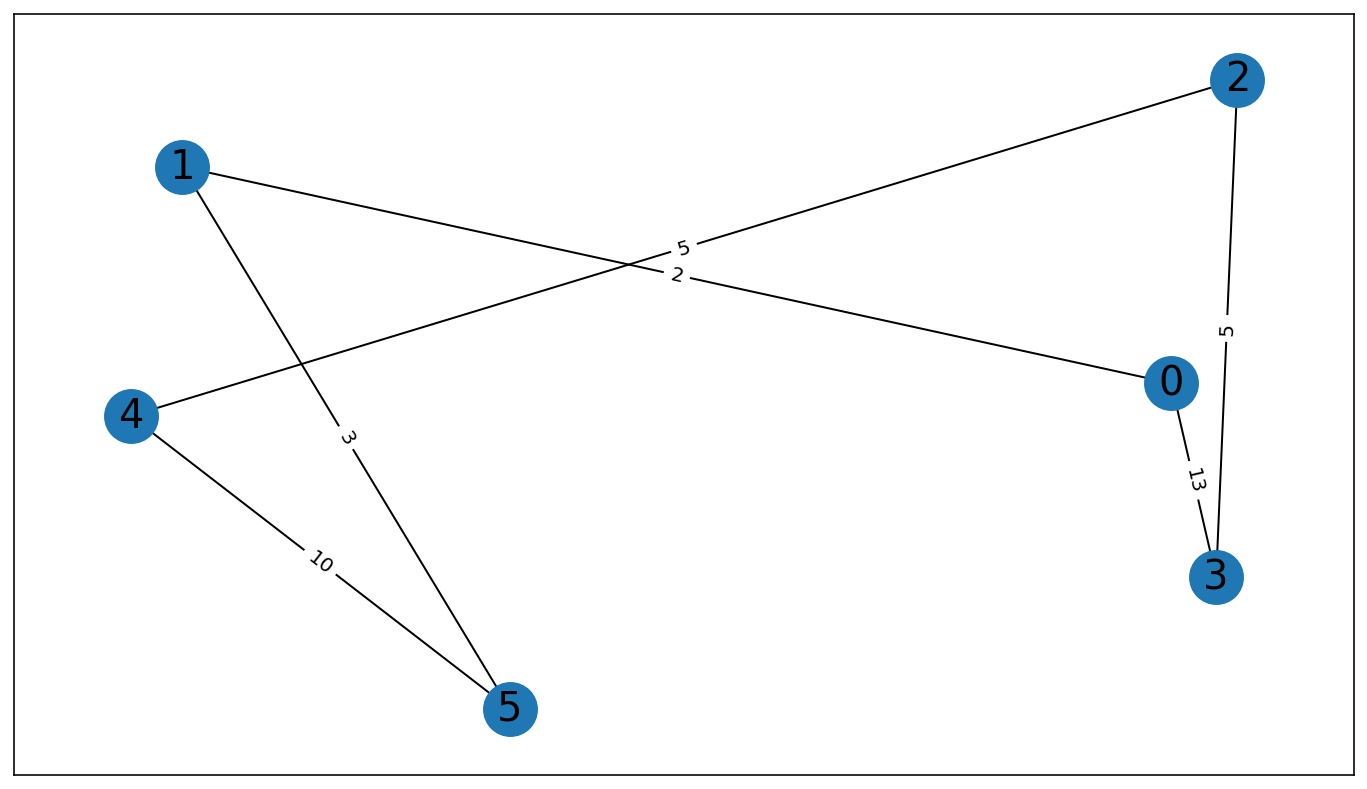

In [35]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Graph

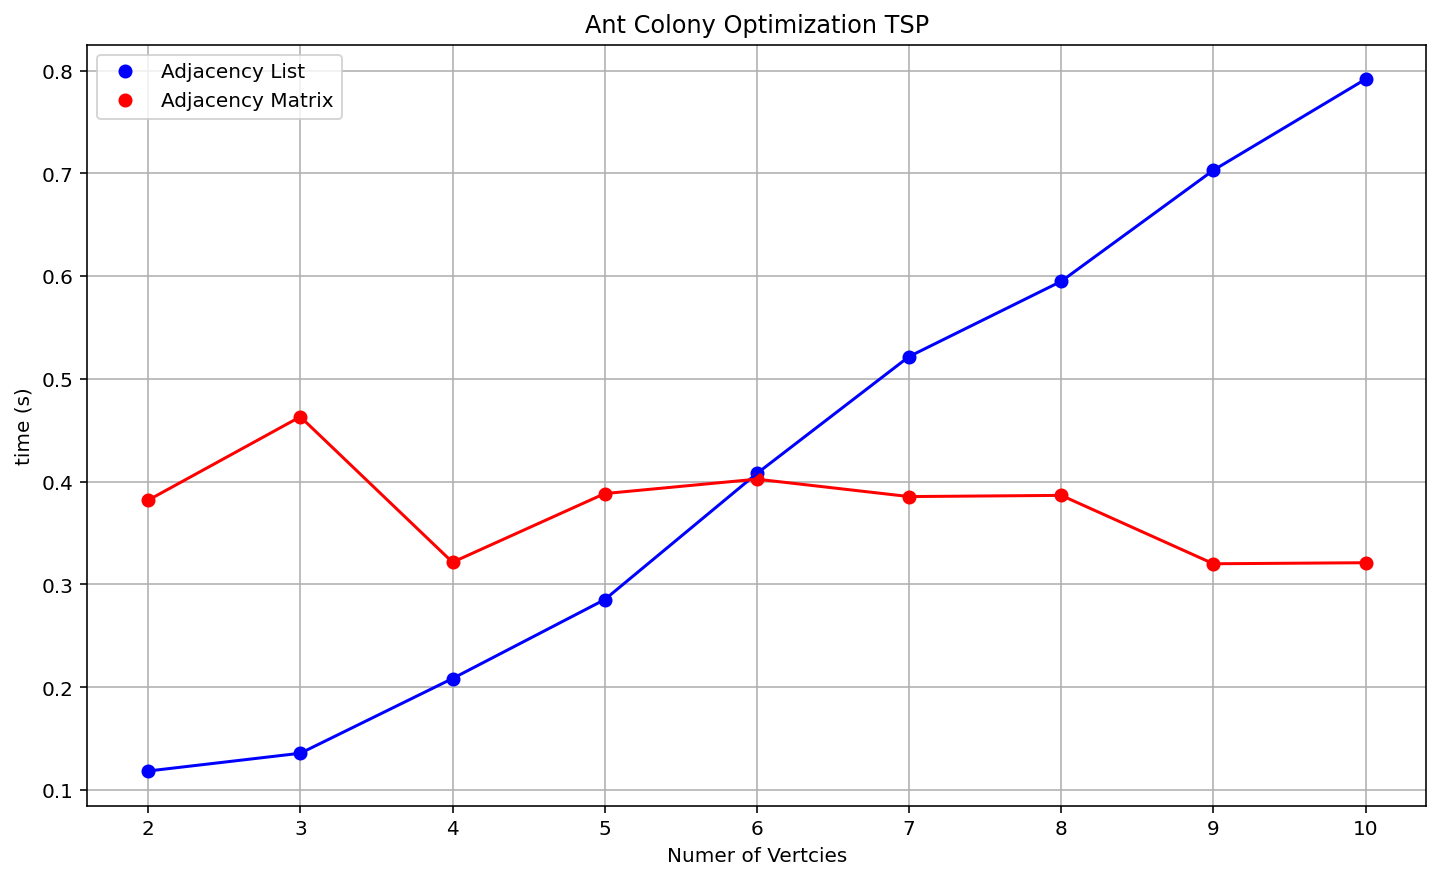

In [36]:
# Ant Colony Opimization Graph
y1 = []
y2 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    ant_colony_optimization_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    
    start = time.time()
    ant_colony_optimization_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
plt.plot(sample, y1,'bo', label="Adjacency List")
plt.plot(sample, y2,'ro', label="Adjacency Matrix")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

# Graph setup
plt.title("Ant Colony Optimization TSP")
plt.xlabel("Numer of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

The adjacency matrix performs faster than the adjacency list until the number of vertices is 6 which is when the adjacency list starts performing worse than the adjacency matrix for the ant colony algorithm. This is faster than the normal brute force algorithm but as it is approximation meaing it does not always find the optimal solution.

### 2-opt Algorithm

#### Adjacency List

In [37]:
def two_opt_adj_list(graph):
    route = nearest_neighbor_adj_list(graph)[0][:-1]
    best_route = route[:]
    best_distance = sum(graph.get(route[i]).get(route[i+1]) for i in range(len(route)-1)) + graph.get(route[-1]).get(route[0])
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route)-2):
            for j in range(i+1, len(route)):
                if j-i == 1:
                    continue
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                new_distance = sum(graph.get(new_route[k]).get(new_route[k+1]) for k in range(len(new_route)-1)) + graph.get(new_route[-1]).get(new_route[0])
                if new_distance < best_distance:
                    best_route = new_route[:]
                    best_distance = new_distance
                    route = new_route[:]
                    improved = True
    best_route.append(best_route[0])
    return best_route, best_distance

In [38]:
path, dist = two_opt_adj_list(adj_list)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 2, 3, 4, 0] with a distance of 49


##### Path Visualization

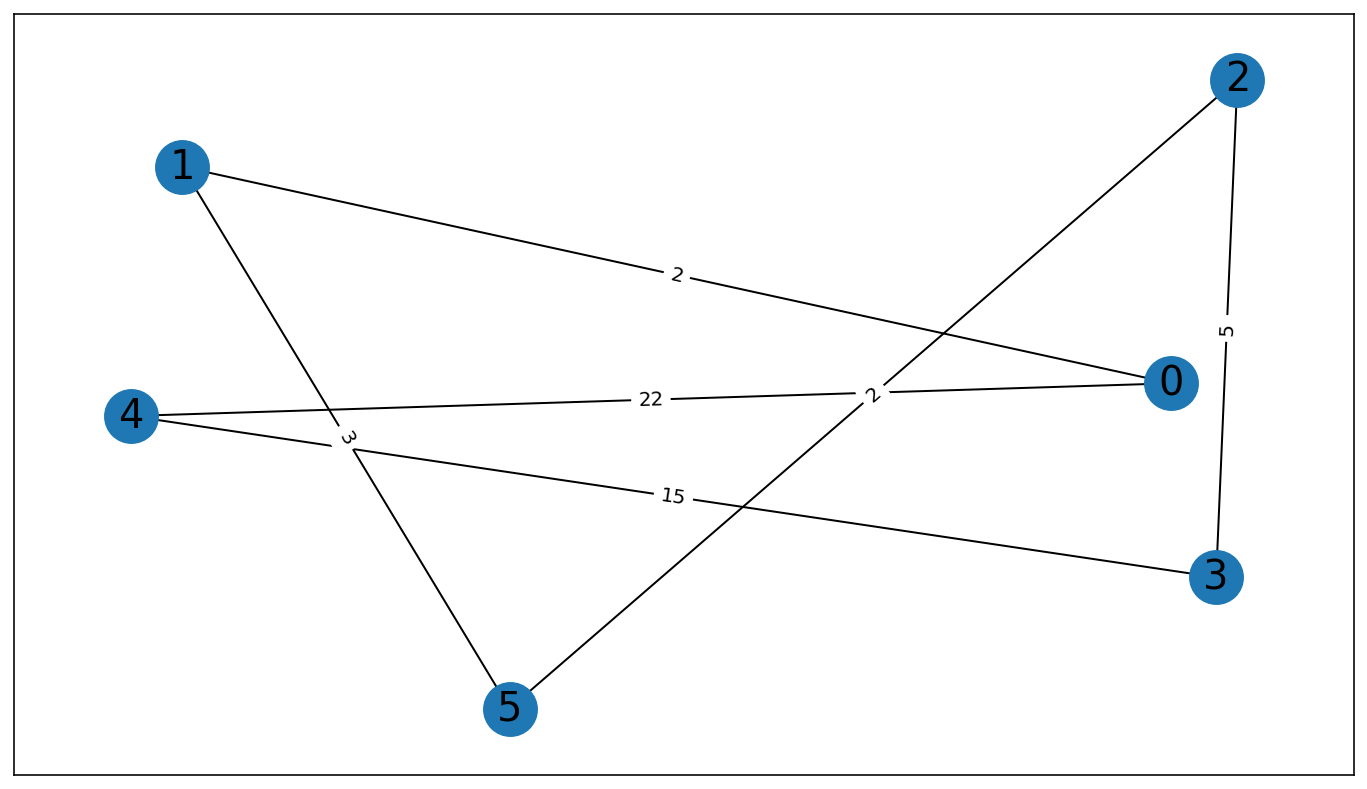

In [39]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Adjacency Matrix

In [40]:
def two_opt_adj_matrix(graph):
    route = nearest_neighbor_adj_matrix(graph)[0][:-1]
    best_route = route[:]
    best_distance = sum(graph[route[i]][route[i+1]] for i in range(len(route)-1)) + graph[route[-1]][route[0]]
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route)-2):
            for j in range(i+1, len(route)):
                if j-i == 1:
                    continue
                new_route = route[:i] + route[i:j][::-1] + route[j:]
                new_distance = sum(graph[new_route[k]][new_route[k+1]] for k in range(len(new_route)-1)) + graph[new_route[-1]][new_route[0]]
                if new_distance < best_distance:
                    best_route = new_route[:]
                    best_distance = new_distance
                    route = new_route[:]
                    improved = True
    best_route.append(best_route[0])
    return best_route, best_distance

In [41]:
path, dist = two_opt_adj_matrix(adj_matrix)
print(f"The shortest tour is: {path} with a distance of {dist}")

The shortest tour is: [0, 1, 5, 2, 3, 4, 0] with a distance of 49


##### Path Visualization

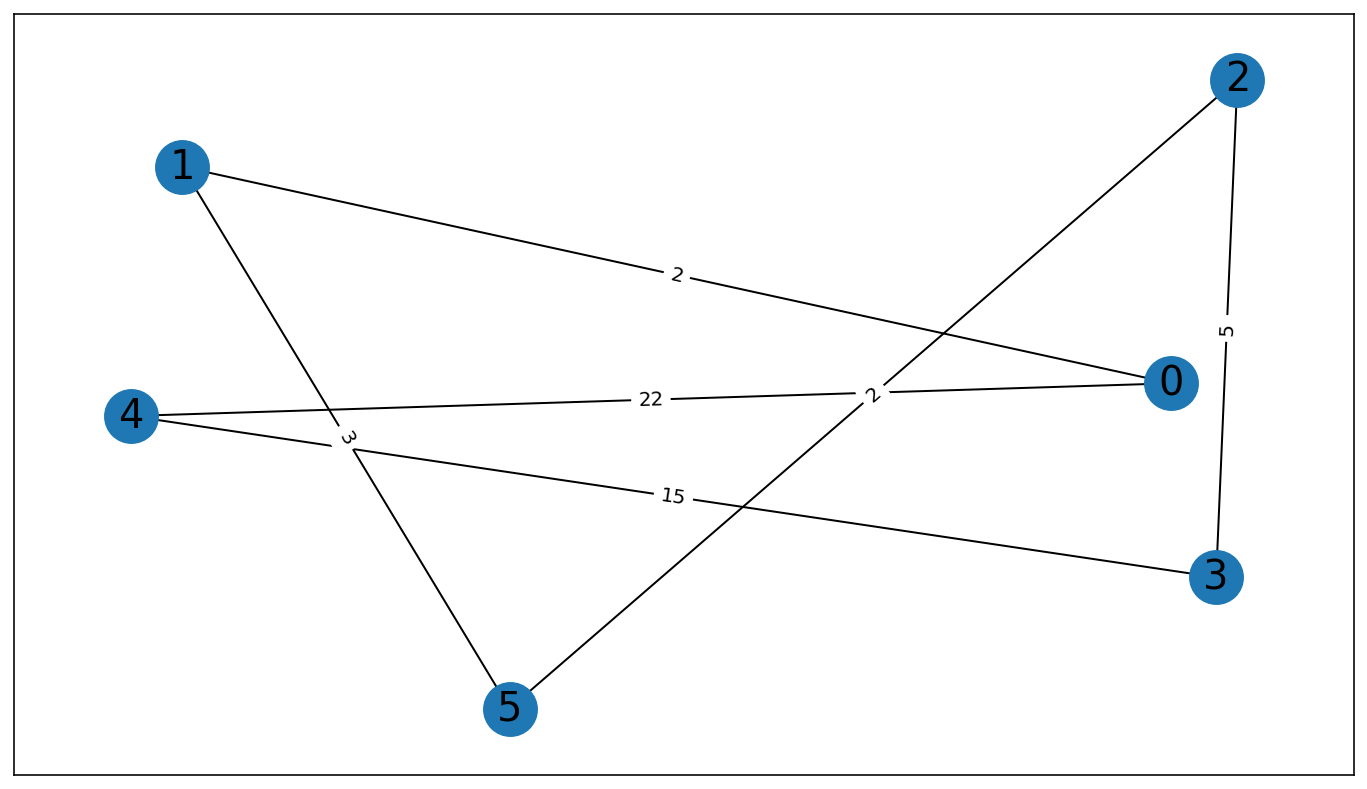

In [42]:
matrix = np.full_like(adj_matrix, 0)
for i in range(len(path) - 1):
    matrix[path[i]][path[i + 1]] = adj_matrix[path[i]][path[i + 1]]

G = nx.Graph(np.array(matrix))
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#### Graph

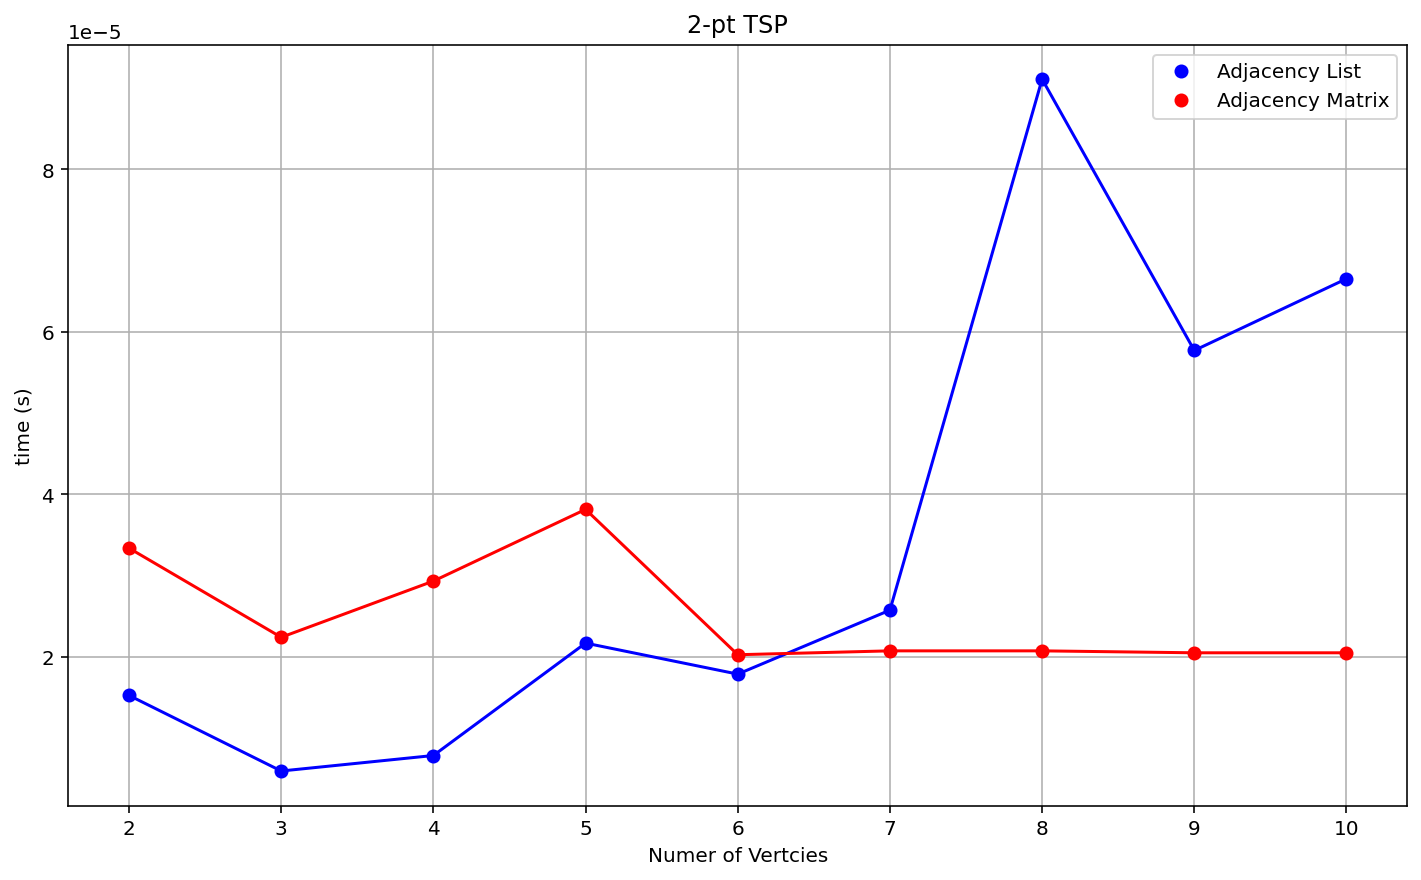

In [43]:
# 2-opt Graph
y1 = []
y2 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    two_opt_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    
    start = time.time()
    two_opt_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
plt.plot(sample, y1,'bo', label="Adjacency List")
plt.plot(sample, y2,'ro', label="Adjacency Matrix")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

# Graph setup
plt.title("2-pt TSP")
plt.xlabel("Numer of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

The adjacency matrix performs faster than the adjacency list until the number of vertices is 6 which is when the adjacency list starts performing better than the adjacency matrix for the 2-opt algorithm. The 2-opt algorithm for both data sturctures performs in $O(n^3)$. While not shown in the graph due to performance increasing drastically adjacecy list begins to perform slower. This is faster than the normal brute force algorithm but as it is approximation while it is faster than brute force the optimal solution is not guaranteed.

### Algorithm Comparison Graph

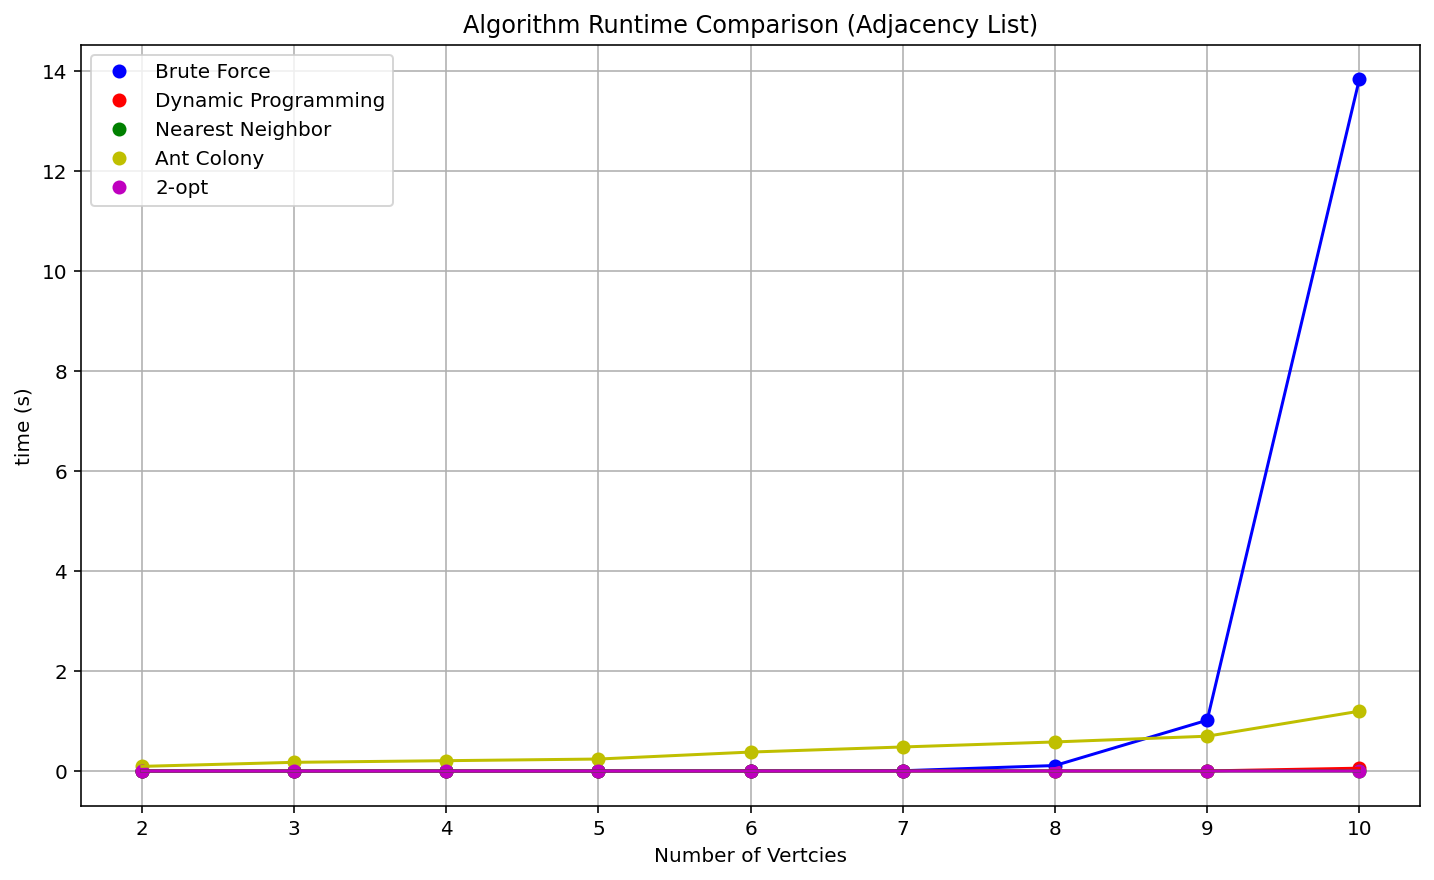

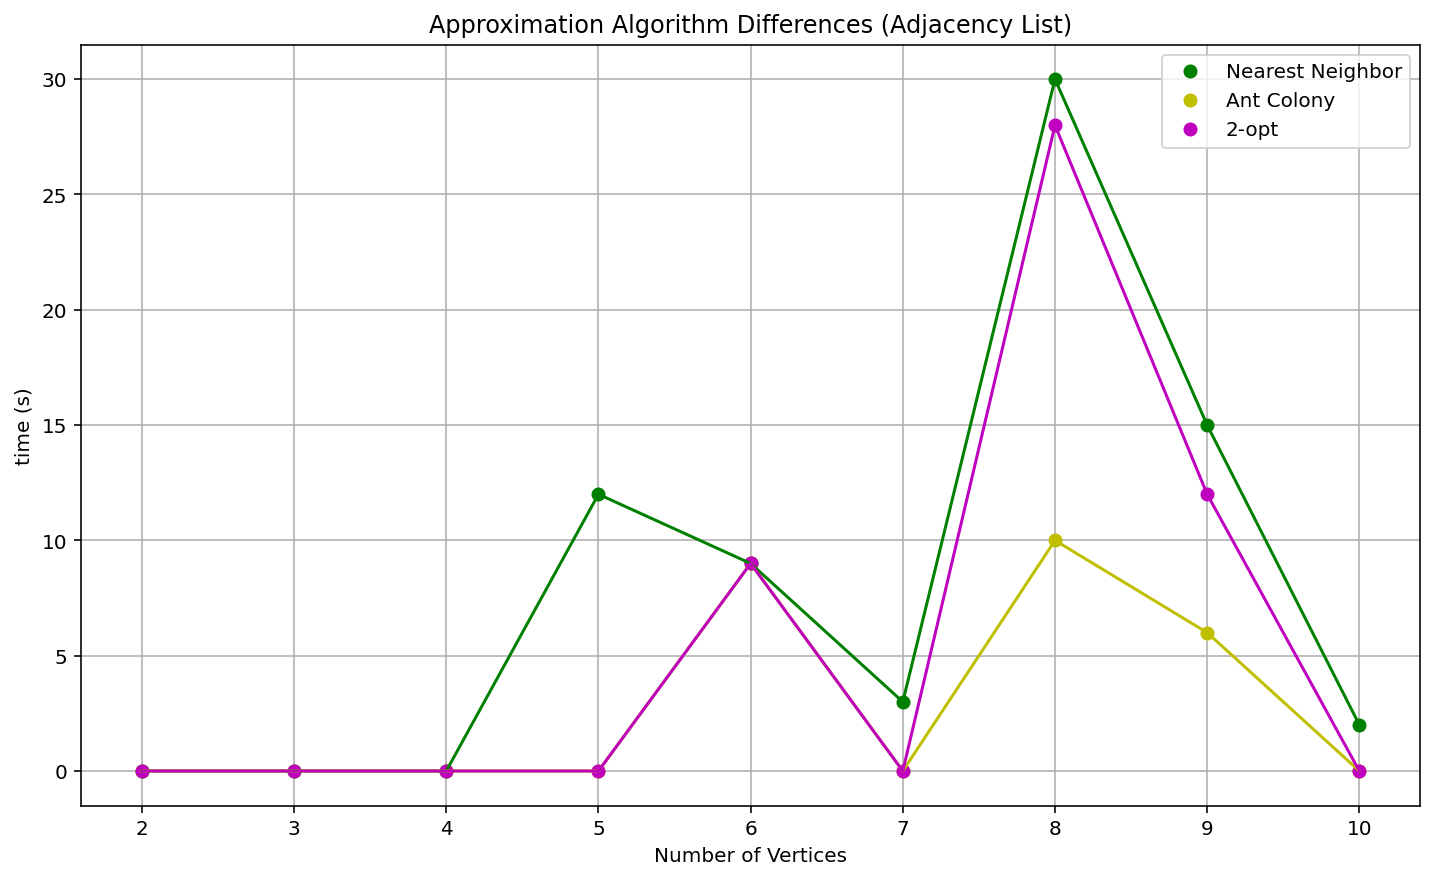

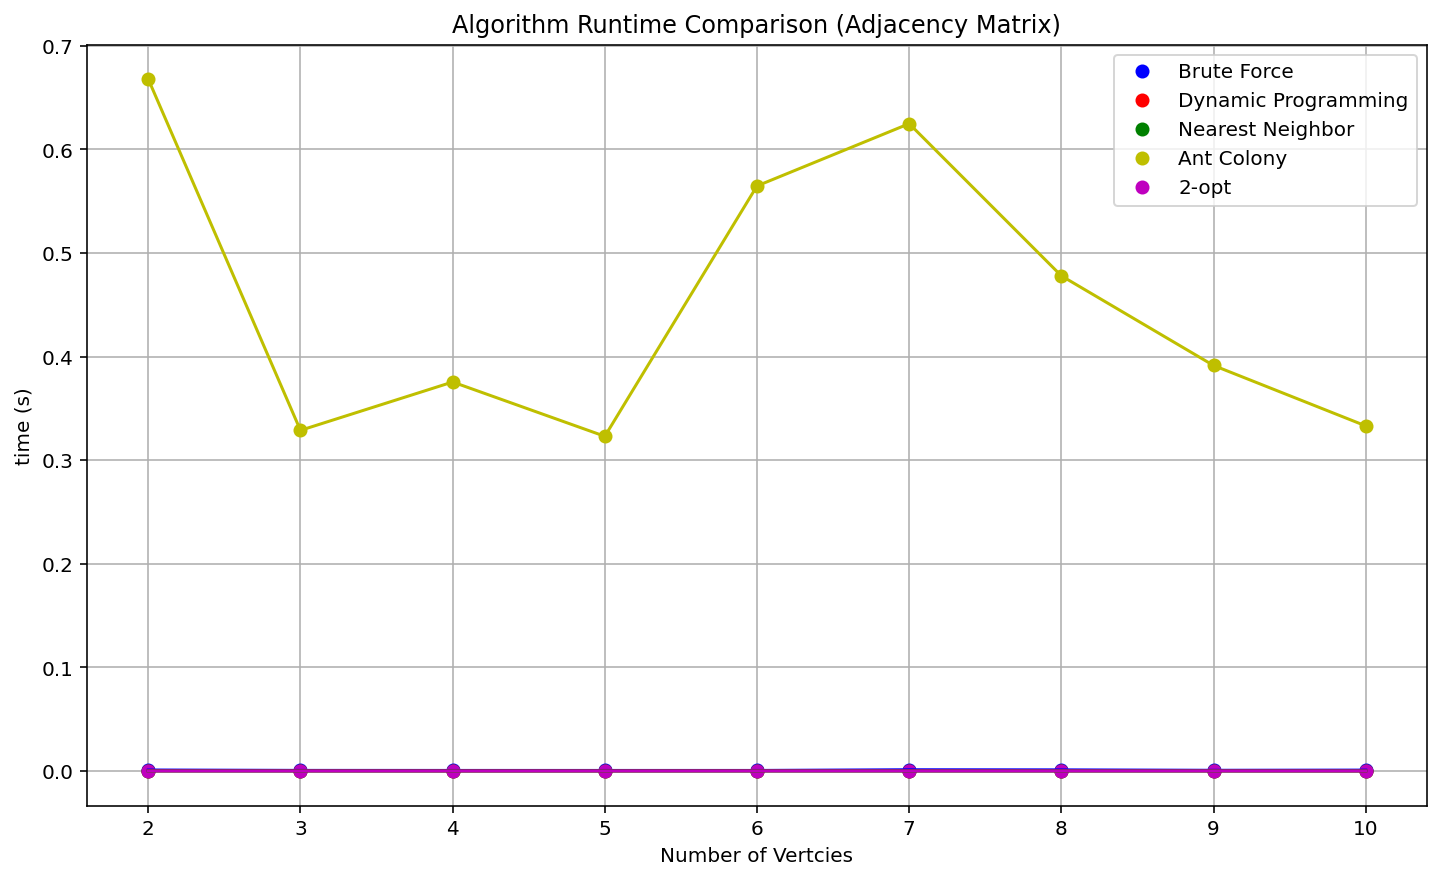

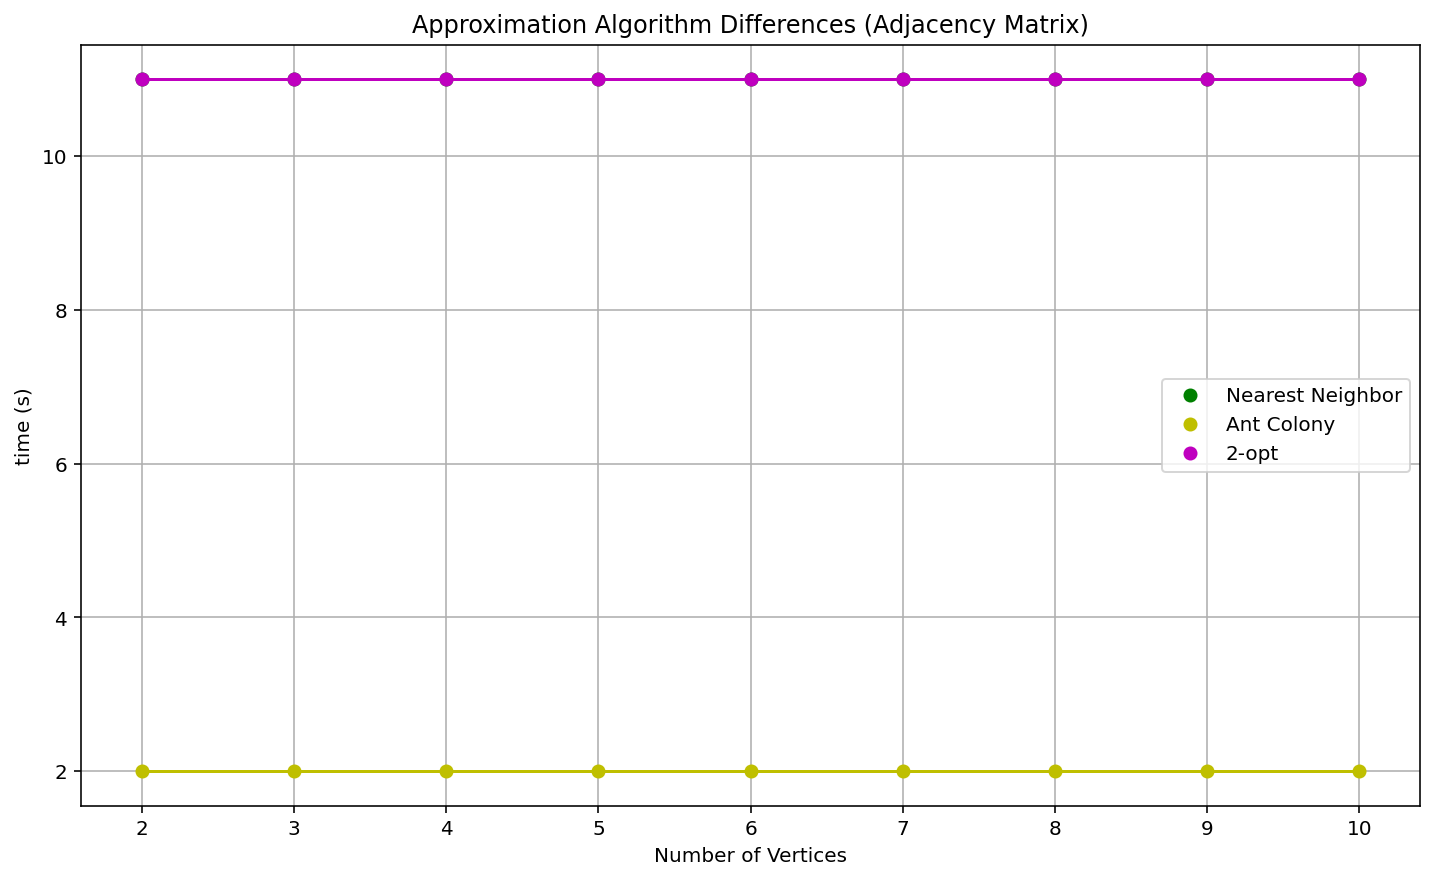

In [44]:
# Algorithm Comparison Graph (Adjacency List)
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
dist1 = []
dist3 = []
dist4 = []
dist5 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    _, distBF = brute_force_adj_list(dists)
    end = time.time()
    y1.append(end - start)
    dist1.append(distBF)
    
    start = time.time()
    TSP_DP_adj_list(dists)
    end = time.time()
    y2.append(end - start)
    
    start = time.time()
    _, dist = nearest_neighbor_adj_list(dists)
    end = time.time()
    y3.append(end - start)
    dist3.append(dist)
    
    start = time.time()
    _, dist = ant_colony_optimization_adj_list(dists)
    end = time.time()
    y4.append(end - start)
    dist4.append(dist)
    
    start = time.time()
    _, dist = two_opt_adj_list(dists)
    end = time.time()
    y5.append(end - start)
    dist5.append(dist)
    
plt.plot(sample, y1,'bo', label="Brute Force")
plt.plot(sample, y2,'ro', label="Dynamic Programming")
plt.plot(sample, y3,'go', label="Nearest Neighbor")
plt.plot(sample, y4,'yo', label="Ant Colony")
plt.plot(sample, y5,'mo', label="2-opt")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

a1 = np.polyfit(sample, y3, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'g')

a1 = np.polyfit(sample, y4, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'y')

a1 = np.polyfit(sample, y5, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'm')

# Graph setup
plt.title("Algorithm Runtime Comparison (Adjacency List)")
plt.xlabel("Number of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

# Difference in algorithm from approximate from brute force
y1 = []
y2 = []
y3 = []
for i in range(len(dist1)):
    y1.append(dist3[i] - dist1[i])
    y2.append(dist4[i] - dist1[i])
    y3.append(dist5[i] - dist1[i])
plt.plot(sample, y1,'go', label="Nearest Neighbor")
plt.plot(sample, y2,'yo', label="Ant Colony")
plt.plot(sample, y3,'mo', label="2-opt")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'g')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'y')

a1 = np.polyfit(sample, y3, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'm')

plt.title("Approximation Algorithm Differences (Adjacency List)")
plt.xlabel("Number of Vertices")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

# Algorithm Comparison Graph (Adjacency Matrix)
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
dist1 = []
dist3 = []
dist4 = []
dist5 = []
sample = np.array([i for i in range(2, 11)])
for x in sample:
    dists = generate_dists(x)
    
    start = time.time()
    _, distBF = brute_force_adj_matrix(create_matrix(dists))
    end = time.time()
    y1.append(end - start)
    dist1.append(distBF)
    
    start = time.time()
    TSP_DP_adj_matrix(create_matrix(dists))
    end = time.time()
    y2.append(end - start)
    
    start = time.time()
    _, dist = nearest_neighbor_adj_matrix(create_matrix(dists))
    end = time.time()
    y3.append(end - start)
    dist3.append(dist)
    
    start = time.time()
    _, dist = ant_colony_optimization_adj_matrix(create_matrix(dists))
    end = time.time()
    y4.append(end - start)
    dist4.append(dist)
    
    start = time.time()
    _, dist = two_opt_adj_matrix(create_matrix(dists))
    end = time.time()
    y5.append(end - start)
    dist5.append(dist)
    
plt.plot(sample, y1,'bo', label="Brute Force")
plt.plot(sample, y2,'ro', label="Dynamic Programming")
plt.plot(sample, y3,'go', label="Nearest Neighbor")
plt.plot(sample, y4,'yo', label="Ant Colony")
plt.plot(sample, y5,'mo', label="2-opt")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'b')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'r')

a1 = np.polyfit(sample, y3, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'g')

a1 = np.polyfit(sample, y4, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'y')

a1 = np.polyfit(sample, y5, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'm')

# Graph setup
plt.title("Algorithm Runtime Comparison (Adjacency Matrix)")
plt.xlabel("Number of Vertcies")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

# Difference in algorithm from approximate from brute force
y1 = []
y2 = []
y3 = []
for i in range(len(dist1)):
    y1.append(dist3[i] - dist1[i])
    y2.append(dist4[i] - dist1[i])
    y3.append(dist5[i] - dist1[i])
plt.plot(sample, y1,'go', label="Nearest Neighbor")
plt.plot(sample, y2,'yo', label="Ant Colony")
plt.plot(sample, y3,'mo', label="2-opt")

order = 8 # Precison of line of best fit
a1 = np.polyfit(sample, y1, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'g')

a1 = np.polyfit(sample, y2, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'y')

a1 = np.polyfit(sample, y3, order)
func = 0
for i in range(order):
    func += a1[i] * sample ** (order - i)
func += a1[len(a1) - 1]
plt.plot(sample, func, 'm')

plt.title("Approximation Algorithm Differences (Adjacency Matrix)")
plt.xlabel("Number of Vertices")
plt.ylabel("time (s)")
plt.grid()
plt.legend()
plt.show()

Figure Top-Left: For the adjacency list nearest neighbor, 2-opt, and dynamic programming perform at around the same time for all numbers of vertices. Ant colony performs slower than these three algorithms. When the number of vertices equal to 9 the brute force algorithm performs slower than all the other algorithms for the adjacency list.

Figure Top-Right: For the adjacency list two opt gets the optimal solution or close to the optimal solution. While ant colony and nearest neighbor get close the optimal solution more than getting the optimal solution.

Figure Bottom-Left: For the adjacency matrix brute force, dynamic programming, nearest neighbor, and 2-opt perform at around the same time for all numbers of vertices. The ant colony performs slower than all the other algorithms.

Figure Bottom-Right: For the adjacency matrix the ant colony performs well across the board and is close to if not exactly the optimal solution. While nearest neighbor and 2-opt for number of vertices less than 10 may achieve a solution close the optimal solution but for most cases less than 10 vertices it does not achieve the optimal solution.

## References
https://en.wikipedia.org/wiki/Travelling_salesman_problem

https://www.math.uwaterloo.ca/tsp/world/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9924317/#:~:text=Compared%20to%20the%20other%20models,a%20success%20rate%20of%2091.11%25.